In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# import pywt
import skimage
from skimage.transform import resize
from time import time
%matplotlib inline

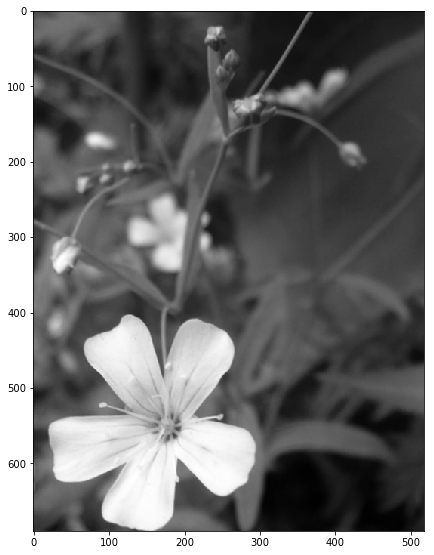

In [2]:
img = cv2.imread('data/flower5.png',0)

img_float = skimage.img_as_float(img)
h, w = img.shape

sc = 1.3
img_float = resize(img_float, (h//sc, w//sc), mode='reflect')

plt.figure(figsize=(7,12))
plt.imshow(img_float,cmap = 'gray')

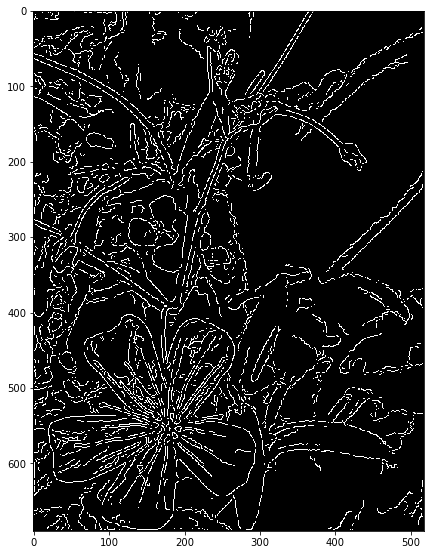

In [3]:
from skimage import feature


# edges = cv2.Canny(img,15,80) / 255

edges = feature.canny(img_float, low_threshold=0.02, high_threshold=0.07)

plt.figure(figsize=(7,12))
plt.imshow(edges, cmap = 'gray')

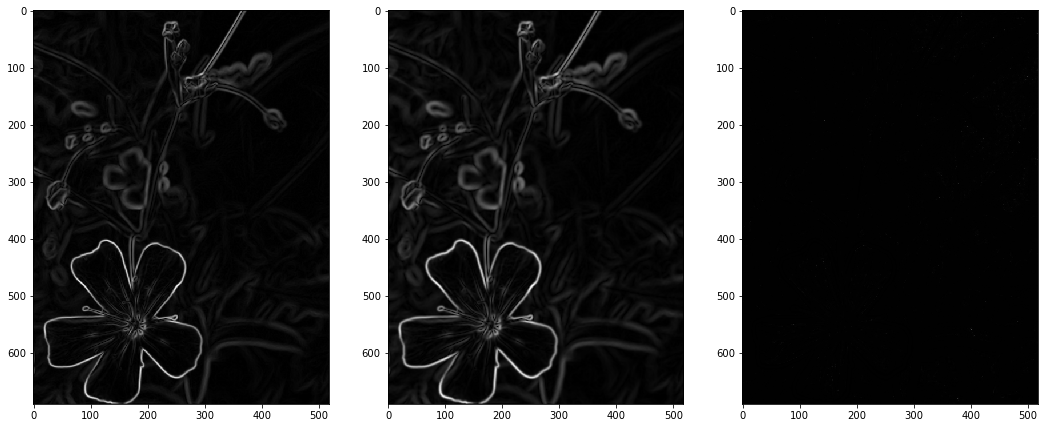

In [4]:
from skimage.filters import gaussian
from scipy import ndimage, misc


sigma_1 = 1.
sigma_2 = sigma_1*1.5

img_grad_1 = ndimage.gaussian_gradient_magnitude(img_float, sigma=sigma_1)
img_grad_2 = ndimage.gaussian_gradient_magnitude(img_float, sigma=sigma_2)


ratio_image = img_grad_1 / img_grad_2

fig, ax = plt.subplots(1,3, figsize=(18,12))

ax[0].imshow(img_grad_1, cmap='gray')
ax[1].imshow(img_grad_2, cmap='gray')
ax[2].imshow(ratio_image, cmap='gray')

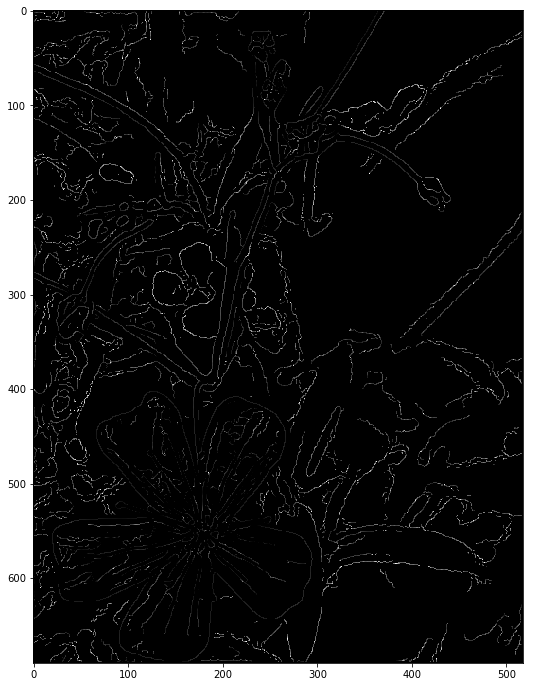

In [5]:
valid_inds = np.where(edges * (ratio_image > 1.01) * (ratio_image <= (sigma_2/sigma_1)))

sparse_map = np.zeros_like(img_float)
sparse_map[valid_inds] = np.sqrt((ratio_image[valid_inds]**2 * sigma_1**2 - sigma_2**2)/(1 - ratio_image[valid_inds]**2))

plt.figure(figsize=(15,12))
plt.imshow(sparse_map, cmap='gray')

In [6]:
import laplacian as lpl
from skimage.transform import rescale
import skimage.io

spmap = sparse_map


L = lpl.compute_laplacian(np.expand_dims(img_float, 2))

In [ ]:
from scipy import sparse

lam = 5e-3

constsMap = (spmap>0.001).reshape(-1)*1.
D = sparse.diags(constsMap)
d = sparse.linalg.spsolve(L + lam*D, lam*D@spmap.reshape(-1))
d = d.reshape(spmap.shape)

In [ ]:
d = d - d.min()
d = d / d.max()
plt.figure(figsize=(10,20))
plt.imshow(d, cmap='gray')